In [7]:
import csv 
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure
from mlxtend.frequent_patterns import association_rules
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import font_manager, rc 
from sklearn.metrics import adjusted_rand_score
import math
from math import sqrt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import copy 
from sklearn.ensemble import IsolationForest
import csv
from selenium import webdriver
import time
from bs4 import BeautifulSoup

f = open('29데이터.csv')
data = csv.reader(f)
data = list(data)
oper_list = []
oper_data = []

# 기업 리스트 뽑기
for i in data:
    for j in i:
        if j != '':
            oper_list.append(j)
            oper_data.append([])
    break

#주가 데이터 뽑기
for row in data[1:]:
    
    for i in range(len(row)-1):
        oper_data[i].append(float(row[i+1]))

#기업별 딕셔너리 만들어서 데이터프레임 만들어주기
oper_dict = {}
for i in range(len(oper_list)):
    oper_dict[oper_list[i]] = oper_data[i]

    
oper_df = DataFrame(oper_dict)




D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\mat

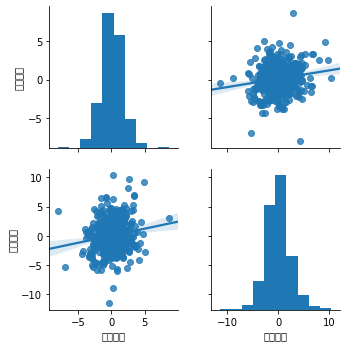

In [8]:
#날짜 비교해보기 (상관관계)
sns.pairplot(oper_df, vars=[oper_list[0], oper_list[6]], kind='reg')

In [9]:
#코사인 유사도로 이상치 찾기
f = open('29데이터.csv')
data = csv.reader(f)
print(data)
next(data)
data_origin=[]
# 리스트에 하나씩 저장
for i in data:
    data_origin.append(i)
len(data_origin)
# 음수 보장되어 있는 똑같은 리스트
data_origin_r=copy.deepcopy(data_origin)

In [10]:
# 모두 양수로
for i in range(0,len(data_origin)):
        for j in range(0,len(data_origin[i])):
            if j==0:
                pass
            else:
                data_origin[i][j]=abs(float(data_origin[i][j]))

In [11]:

small_out_cosine=[]
small_out_index=[]
big_out_cosine=[]
big_out_index=[]
out_index=[]
# 앞과 비교하여 코사인이 높으면 추가
for i in range(0,len(data_origin)):
    if i==0:
        pass
    else:
        n1 = np.array(data_origin[i-1][1:])
        n2 = np.array(data_origin[i][1:])
        multi = sum(n1*n2)
        n1 = float(np.sum(n1*n1))
        n2 = float(np.sum(n2*n2))
        cosine = abs(multi/(n1**(0.5)*n2**(0.5)))
        small_out_cosine.append(cosine)
        
        if cosine<0.4:
#             print('outlier index : ', str(i))
            small_out_index.append(i)
# 뒤와 비교하여 코사인이 높으면 추가
for i in range(0,len(data_origin)):
    if i==len(data_origin)-1:
        pass
    else:
        n1 = np.array(data_origin[i][1:])
        n2 = np.array(data_origin[i+1][1:])
        multi = sum(n1*n2)
        n1 = float(np.sum(n1*n1))
        n2 = float(np.sum(n2*n2))
        cosine = abs(multi/(n1**(0.5)*n2**(0.5)))
        big_out_cosine.append(cosine)
        if cosine<0.4 :
#             print('outlier index2 : ', str(i))
            big_out_index.append(i)
# 공통된 인덱스 뽑기         
for i in small_out_index:
    if i in big_out_index:
        out_index.append(i)

In [12]:
print(out_index)
print("공통되는 아웃라이어")
# for i in out_index:
#     print(data_origin_r[i]

[19, 33, 34, 198, 567, 614]
공통되는 아웃라이어


In [13]:
print(len(out_index))
print(len(big_out_index))
print(len(small_out_index))
print(big_out_index)
print(small_out_index)

6
35
35
[18, 19, 32, 33, 34, 43, 61, 63, 66, 70, 72, 76, 88, 97, 123, 132, 197, 198, 202, 204, 209, 215, 266, 317, 339, 367, 395, 429, 432, 476, 505, 566, 567, 613, 614]
[19, 20, 33, 34, 35, 44, 62, 64, 67, 71, 73, 77, 89, 98, 124, 133, 198, 199, 203, 205, 210, 216, 267, 318, 340, 368, 396, 430, 433, 477, 506, 567, 568, 614, 615]


In [14]:
# 공통되진 않지만 뽑힌 후보 아웃라이어들 중에서
# 평균보다 6배 높은 값이 있으면 아웃라이어로 판별
small_out_index2=[]
big_out_index2=[]
def filter_2(out_index,out_index2):
    for i in out_index:
        a= np.mean(data_origin[i][1:])
        a=float(a)
        b=0
        for j in data_origin[i][1:]:
            if j > a*6:
                b=1
                out_index2.append(i)
                break

In [15]:
print(out_index)
filter_2(big_out_index,out_index)
print(out_index)
filter_2(small_out_index,out_index)
print(out_index)
out_index = list(set(out_index))

[19, 33, 34, 198, 567, 614]
[19, 33, 34, 198, 567, 614, 32, 33, 34, 43, 61, 66, 70, 76, 198, 202, 339, 395, 614]
[19, 33, 34, 198, 567, 614, 32, 33, 34, 43, 61, 66, 70, 76, 198, 202, 339, 395, 614, 33, 34, 62, 64, 71, 89, 124, 198, 210, 318, 340, 368, 430, 477, 614]


In [16]:
out_index.sort()
print(out_index)
print(len(out_index))

[19, 32, 33, 34, 43, 61, 62, 64, 66, 70, 71, 76, 89, 124, 198, 202, 210, 318, 339, 340, 368, 395, 430, 477, 567, 614]
26


In [17]:

# pca (29차원 2차원으로 줄이기)
x = oper_df.loc[:,oper_list[:]].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

principalDf 






,PC1,PC2
0,-0.056265,-0.211064
1,-1.980731,0.126428
2,-2.982378,-1.053132
3,-0.516104,-0.056132
4,0.020642,-0.438275
5,2.809179,0.703859
6,0.923744,-1.231278
7,-1.457594,-1.597882
8,-0.444330,0.427665
9,-0.626860,-1.847640


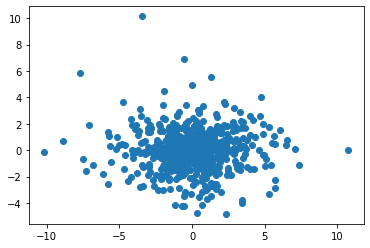

In [18]:
#pca 후 산점도
plt.scatter(principalDf['PC1'],principalDf['PC2'])

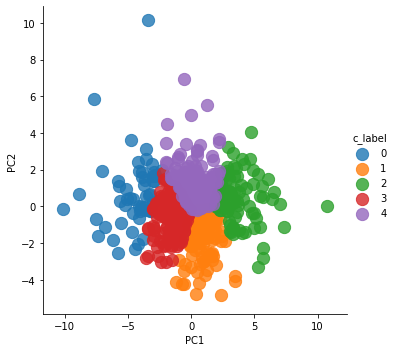

In [19]:
#k-means로 아웃라이어 제거 시도
data_point = principalDf.values

kmeans = KMeans(n_clusters=5).fit(data_point)
kmeans.labels_
principalDf['c_label'] = kmeans.labels_
sns.lmplot('PC1','PC2',data = principalDf,fit_reg =False,scatter_kws={"s":150},hue = "c_label")


In [20]:
#k-means 결과 중 label 2뽑아내기
principalDf[principalDf['c_label'] ==2]

,PC1,PC2,c_label
5,2.809179,0.703859,2
11,2.349979,0.367937,2
14,2.142251,0.722161,2
15,2.787399,1.721686,2
33,2.811895,1.931718,2
35,2.911017,3.218370,2
36,3.111256,-1.333386,2
38,3.392901,2.196820,2
42,3.147896,-1.417850,2
49,5.467272,0.556292,2


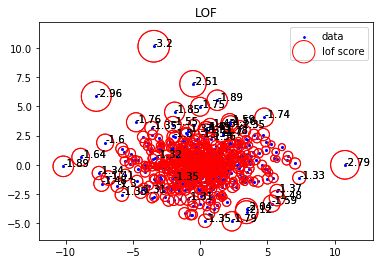

In [21]:
#lof 그래프 그리기

X_inliers = principalDf[['PC1','PC2']]
X_inliers_2 = principalDf[['PC1','PC2']]

X = np.r_[X_inliers, X_inliers_2]

n_inliers_2 = len(X_inliers_2)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_inliers_2:] = -1

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_


plt.title("LOF")
plt.scatter(X[:, 0], X[:, 1], color='b', s=3., label='data')

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) 
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='lof score')
n=np.copy(X_scores)
n[n>-1.3]=np.nan
n=np.round(n,2)
for i, txt in enumerate(n):
    if np.isnan(txt):continue
    plt.annotate(txt, (X[i,0], X[i,1]))
legend = plt.legend(loc='upper right')
plt.show()

In [22]:
#lof 1.5 이상 뽑아내기
principalDf['lof'] = X_scores[:620]
principalDf['lof']= -principalDf['lof']
principalDf[principalDf['lof']>=1.5]

,PC1,PC2,c_label,lof
76,-1.899994,4.505969,4,1.851915
82,-0.013861,4.964429,4,1.746789
86,5.311728,-3.303194,2,1.590841
93,3.444960,-4.041094,1,2.123781
99,1.268921,5.524790,4,1.886137
118,2.353921,-4.820632,1,1.788618
126,-3.450292,10.134727,0,3.199027
143,-0.536927,6.931218,4,2.507451
145,-7.062527,1.903411,0,1.595990
152,-4.770982,3.642009,0,1.763206


In [23]:
#isolation Forest
df = pd.read_csv('29데이터_날짜제거.csv', engine = 'python')
df.head(10)

,삼성전자,삼성화재,삼성생명,삼성증권,삼성제약,현대공업,현대건설,현대해상,현대차증권,현대약품,...,롯데정밀화학,lg전자,lg화학,lg생활건강,lg상사,lg유플러스,동국제약,경동제약,한미약품,일양약품
0,0.226074,0.884956,-1.287554,0.112233,3.296703,6.263982,-2.731591,0.000000,2.463054,1.229508,...,2.140673,-0.507614,-0.552486,-0.802568,1.916376,0.869565,0.000000,-1.020408,-0.980392,0.423729
1,0.225564,0.350877,1.739130,-1.905830,-0.425532,1.157895,0.366300,0.384615,-2.403846,-2.024291,...,-1.796407,-0.680272,-3.055556,-1.294498,-0.683761,3.448276,4.208999,-0.824742,-2.178218,2.109705
2,-2.850713,1.573427,-1.282051,0.114286,1.709402,0.000000,-3.892944,2.490421,0.492611,-0.206612,...,-1.981707,2.910959,-4.871060,-0.655738,-0.516351,0.416667,-1.114206,-0.207900,-1.012146,-1.859504
3,0.926641,2.065404,1.731602,0.000000,0.630252,0.000000,-1.139241,-0.186916,-0.490196,0.000000,...,-0.933126,-0.166389,-0.903614,-0.990099,0.000000,-0.414938,-0.845070,-0.833333,-0.204499,0.210526
4,0.535578,1.349073,2.127660,1.826484,-0.208768,-0.936524,0.000000,0.000000,0.985222,2.691511,...,-2.982732,3.666667,2.127660,2.166667,-0.346021,-2.500000,-1.136364,-0.630252,3.483607,-0.840336
5,0.000000,-1.164725,0.416667,1.457399,-0.209205,-1.995798,1.664533,0.000000,3.414634,-0.604839,...,3.721683,-0.803859,6.250000,-0.978793,0.173611,1.709402,0.000000,0.000000,0.990099,4.449153
6,0.152207,-1.683502,-3.734440,-1.436464,-0.419287,3.751340,-0.881612,-0.561798,-0.471698,2.028398,...,0.624025,0.648298,1.120448,0.988468,3.812825,3.781513,-1.436782,1.902748,-0.490196,1.419878
7,1.747720,1.027397,-0.862069,-2.690583,0.210526,-0.826446,-0.635324,0.000000,-0.473934,1.590457,...,-2.945736,-0.966184,-0.277008,1.305057,-1.836394,0.000000,0.583090,5.394191,1.477833,-1.000000
8,0.448096,0.677966,2.608696,1.152074,-0.630252,-1.458333,-0.383632,-1.506591,-1.428571,-0.195695,...,-0.319489,0.975610,-1.388889,-0.966184,2.891156,-2.834008,3.913043,-5.314961,-0.485437,1.010101
9,-0.817844,0.505051,-3.389831,-1.480638,0.211416,-0.951374,-2.182285,0.956023,-1.449275,0.784314,...,-2.083333,-1.932367,0.563380,0.650407,0.495868,0.833333,8.228731,0.207900,-0.487805,6.200000


In [24]:
clf = IsolationForest()
clf.fit(df)
y_pred_outliers = clf.predict(df)
print(y_pred_outliers)
for i in range(0,len(y_pred_outliers)):
    if y_pred_outliers[i]==-1:
        print(i)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1
 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1
 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [25]:
# 장바구니 분석
f = open('29데이터.csv')
data = csv.reader(f)
data = list(data)
oper_list = []
oper_data = []

for i in data:
    for j in i:
        if j != '':
            oper_list.append(j)
            oper_data.append([])
    break

for row in data[1:]:
    
    for i in range(len(row)-1):
        oper_data[i].append(float(row[i+1]))

oper_dict = {}
for i in range(len(oper_list)):
    oper_dict[oper_list[i]] = oper_data[i]

    
oper_df = DataFrame(oper_dict)


apri_list = []
for i,row in enumerate(data[1:]):
    apri_list.append([])
    for j,row2 in enumerate(row[1:]):
        if float(row2) >= 1:
            apri_list[i].append(oper_list[j])
    
apri_list.remove([])

In [26]:
#장바구니 분석을 위해 해당 날짜중 3% 이상 없는 날짜 제거
while True:
    try:
        apri_list.remove([])
    except:
        print("빈 리스트 제거완료")
        break

빈 리스트 제거완료


In [27]:

# boolean 데이터로 변환
te = TransactionEncoder()
te_ary = te.fit(apri_list).transform(apri_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,lg상사,lg생활건강,lg유플러스,lg전자,lg화학,경동제약,동국제약,롯데손해보험,롯데정밀화학,롯데칠성,...,한화,한화생명,한화손해보험,한화케미칼,한화투자증권,현대건설,현대공업,현대약품,현대차증권,현대해상
0,True,False,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,True,True,True,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,False,True,False,True,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
5,False,False,True,False,True,False,False,False,True,True,...,False,True,True,True,True,True,False,False,True,False
6,True,False,True,False,True,True,False,True,False,True,...,True,False,False,False,False,False,True,True,False,False
7,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,True,False,False,False,False,False,True,True,False,True,...,True,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [28]:
# support 0.02 이상 리스트 출력
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.285714,(lg상사)
1,0.315271,(lg생활건강)
2,0.293924,(lg유플러스)
3,0.262726,(lg전자)
4,0.285714,(lg화학)
5,0.221675,(경동제약)
6,0.334975,(동국제약)
7,0.210181,(롯데손해보험)
8,0.279146,(롯데정밀화학)
9,0.251232,(롯데칠성)


In [29]:
# confidence 0.3 이상 뽑아내기
apri_result = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)


In [30]:
#lift로 정렬
apri_result.sort_values(by=['lift'], axis=0, ascending=False)[0:30]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
363424,"(lg생활건강, 한화투자증권, 한화, 삼성제약)","(롯데케미칼, 삼성증권, 한미약품, 한화케미칼)",0.029557,0.031199,0.021346,0.722222,23.149123,0.020424,3.487685
363413,"(롯데케미칼, 삼성증권, 한미약품, 한화케미칼)","(lg생활건강, 한화투자증권, 한화, 삼성제약)",0.031199,0.029557,0.021346,0.684211,23.149123,0.020424,3.073071
346478,"(한화투자증권, 현대차증권, 한화생명, lg화학)","(롯데케미칼, 한화손해보험, 삼성증권)",0.027915,0.036125,0.022989,0.823529,22.796791,0.021980,5.461959
346525,"(한화생명, 롯데케미칼, 삼성증권)","(한화투자증권, 현대차증권, 한화손해보험, lg화학)",0.036125,0.027915,0.022989,0.636364,22.796791,0.021980,2.673235
346477,"(한화투자증권, 현대차증권, 한화손해보험, lg화학)","(한화생명, 롯데케미칼, 삼성증권)",0.027915,0.036125,0.022989,0.823529,22.796791,0.021980,5.461959
346524,"(롯데케미칼, 한화손해보험, 삼성증권)","(한화투자증권, 현대차증권, 한화생명, lg화학)",0.036125,0.027915,0.022989,0.636364,22.796791,0.021980,2.673235
352291,"(한화투자증권, 롯데정밀화학, 한화손해보험, 현대차증권)","(한화생명, 롯데케미칼, 삼성증권)",0.029557,0.036125,0.022989,0.777778,21.530303,0.021921,4.337438
352349,"(롯데케미칼, 한화손해보험, 삼성증권)","(한화투자증권, 롯데정밀화학, 한화생명, 현대차증권)",0.036125,0.029557,0.022989,0.636364,21.530303,0.021921,2.668719
352350,"(한화생명, 롯데케미칼, 삼성증권)","(한화투자증권, 롯데정밀화학, 한화손해보험, 현대차증권)",0.036125,0.029557,0.022989,0.636364,21.530303,0.021921,2.668719
352292,"(한화투자증권, 롯데정밀화학, 한화생명, 현대차증권)","(롯데케미칼, 한화손해보험, 삼성증권)",0.029557,0.036125,0.022989,0.777778,21.530303,0.021921,4.337438


In [31]:
#클러스터 
string_list = []
# 문서로 바꿔주기
apri_list
for l in apri_list:
    tmp = ""
    for j in l:
        tmp = tmp + " " + j
    string_list.append(tmp.strip())

In [32]:
#문서 리스트
string_list

['삼성제약 현대공업 현대차증권 현대약품 한화생명 한화손해보험 롯데정밀화학 lg상사',
 '삼성생명 현대공업 lg유플러스 동국제약 일양약품',
 '삼성화재 삼성제약 현대해상 lg전자',
 '삼성화재 삼성생명 한화케미칼 롯데칠성 롯데케미칼',
 '삼성화재 삼성생명 삼성증권 현대약품 한화케미칼 한화 lg전자 lg화학 lg생활건강 한미약품',
 '삼성증권 현대건설 현대차증권 한화케미칼 한화투자증권 한화생명 한화손해보험 롯데칠성 롯데케미칼 롯데정밀화학 lg화학 lg유플러스 일양약품',
 '현대공업 현대약품 한화 롯데손해보험 롯데칠성 lg화학 lg상사 lg유플러스 경동제약 일양약품',
 '삼성전자 삼성화재 현대약품 lg생활건강 경동제약 한미약품',
 '삼성생명 삼성증권 한화 롯데손해보험 롯데칠성 lg상사 동국제약 일양약품',
 '한화케미칼 롯데케미칼 동국제약 일양약품',
 '동국제약',
 '삼성전자 삼성증권 삼성제약 현대건설 한화케미칼 롯데케미칼 롯데정밀화학 lg화학 일양약품',
 '삼성전자 현대건설 현대차증권 현대약품 롯데칠성 롯데하이마트 lg화학 lg상사 lg유플러스 동국제약',
 '삼성전자 삼성화재 삼성생명 삼성제약 현대약품 한화생명 한화손해보험 롯데케미칼 lg상사 lg유플러스 동국제약 경동제약 한미약품',
 '삼성증권 현대건설 한화케미칼 한화 롯데케미칼 lg전자 lg화학 lg생활건강 동국제약',
 '삼성화재 삼성생명 삼성증권 삼성제약 현대건설 현대차증권 한화투자증권 한화생명 한화손해보험 롯데칠성 롯데케미칼 lg화학 lg상사 lg유플러스',
 '삼성화재 삼성제약 현대공업 현대건설 롯데하이마트 lg전자 한미약품 일양약품',
 '삼성화재 삼성생명 현대공업 현대해상 한화케미칼 롯데케미칼 롯데정밀화학 lg전자 lg화학 lg생활건강',
 '삼성화재 삼성증권 현대건설 롯데케미칼 롯데정밀화학 lg생활건강 한미약품 일양약품',
 '현대해상 한화투자증권 롯데정밀화학',
 '삼성증권 삼성제약 현대해상 한화투자증권 롯데칠성 롯데케미칼 롯데하이마트 롯데정밀화학 lg생활건강 lg상사 동

In [33]:
# tf-idf벡터로 바꿔주기

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(string_list)
for i in X:
    print(i)

  (0, 14)	0.32970604572663287
  (0, 25)	0.3903621015600217
  (0, 27)	0.37411088735319226
  (0, 26)	0.3209738130444599
  (0, 20)	0.36556020352887914
  (0, 21)	0.36556020352887914
  (0, 8)	0.33985205116094475
  (0, 0)	0.3363930244431436
  (0, 25)	0.5034202517185639
  (0, 12)	0.4768699404955658
  (0, 2)	0.4283856396647923
  (0, 6)	0.40329541688251414
  (0, 17)	0.4159346829274032
  (0, 14)	0.48313990512335153
  (0, 16)	0.5071699945330376
  (0, 28)	0.4980075126981873
  (0, 3)	0.5112171221887254
  (0, 12)	0.4863281572822818
  (0, 16)	0.45519769601293864
  (0, 22)	0.41517131871927543
  (0, 9)	0.4675759467252116
  (0, 10)	0.4065531836498794
  (0, 26)	0.30219216099718854
  (0, 12)	0.34813725872340173
  (0, 16)	0.325852566202887
  (0, 3)	0.32845281256322373
  (0, 22)	0.29719974596415194
  (0, 15)	0.3319962114614458
  (0, 19)	0.3119611679423999
  (0, 4)	0.31670912351585756
  (0, 1)	0.3029200317509321
  (0, 18)	0.2923782544147927
  (0, 27)	0.30428882346342034
  (0, 20)	0.29733399373602043
  (0, 21

In [34]:
# 클러스터링
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=90000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=90000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
# 클러스터 내에서 가장 많이 나온 기업 출력
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("%d번째 클러스터" % int(i+1),)
    for ind in order_centroids[i,:8]:
        
        print(terms[ind],end=' ')
    print("\n")

1번째 클러스터
경동제약 현대약품 동국제약 일양약품 한화 한미약품 삼성제약 삼성생명 

2번째 클러스터
한화손해보험 한화생명 현대해상 롯데케미칼 한화케미칼 lg전자 현대건설 한화투자증권 

3번째 클러스터
lg화학 현대건설 한화케미칼 삼성증권 롯데케미칼 한화투자증권 한화 롯데정밀화학 

4번째 클러스터
한미약품 삼성제약 일양약품 롯데칠성 lg생활건강 롯데하이마트 동국제약 한화투자증권 

5번째 클러스터
lg유플러스 lg전자 삼성전자 현대해상 lg생활건강 삼성화재 롯데케미칼 동국제약 



In [36]:
#협업 필터링
d2 = data[1:]

#주가데이터 생성

score = []
for i in d2:
    

    l2 = []
    for k, j in enumerate(i[1:]):
        
     
        l2.append(float(j))

    score.append(l2)
        

In [37]:
#0~5로 바꿔주기

score_array = np.array(score)
score_array
score_scale = (score_array - score_array.min(axis=0)) / (score_array.max(axis=0) - score_array.min(axis=0))

score_scale = score_scale * 5
score_scale


array([[2.47006733, 3.17715261, 1.89419878, ..., 3.03617407, 1.79682482,
        2.5205132 ],
       [2.46991487, 3.02938524, 2.62890083, ..., 3.07964863, 1.67290415,
        2.67627911],
       [1.55018537, 3.3676368 , 1.89553443, ..., 3.21670334, 1.79353976,
        2.30956719],
       ...,
       [2.26318324, 3.1268062 , 2.414213  , ..., 3.26289621, 1.84240499,
        2.33028861],
       [2.77142468, 2.78744834, 2.20674157, ..., 3.26289621, 2.05266094,
        2.37503499],
       [2.70409095, 2.98084538, 2.41245477, ..., 3.32136666, 2.10571356,
        2.51722132]])

In [38]:
#평균 구하기
np.mean(score_scale)

2.3847773347147214

In [39]:
#평균 이상 데이터만 딕셔너리 추가
d2 = data[1:]
c = {}
l = []
score = []
for o, i in enumerate(d2):
    
    tmp = {}
    l2 = []
    for k, j in enumerate(i[1:]):
        

        if score_scale[o][k] > np.mean(score_scale):
            tmp[oper_list[k]] = score_scale[o][k]
 
    c[i[0]] = tmp
c

{'2015-01-02': {'삼성전자': 2.4700673321559345,
  '삼성화재': 3.1771526093967943,
  '삼성증권': 2.623076723147409,
  '삼성제약': 2.5379838977060265,
  '현대공업': 4.297249847829059,
  '현대해상': 2.593767236622978,
  '현대차증권': 3.322056559424368,
  '현대약품': 2.7925731269485645,
  '한화투자증권': 2.508452744881441,
  '롯데케미칼': 3.0962760514846703,
  '롯데정밀화학': 2.9347105558860087,
  'lg상사': 2.6746087201317965,
  'lg유플러스': 2.922513194014308,
  '경동제약': 3.0361740723585156,
  '일양약품': 2.5205131955318416},
 '2015-01-05': {'삼성전자': 2.4699148725933626,
  '삼성화재': 3.0293852415867155,
  '삼성생명': 2.6289008304922827,
  '현대공업': 3.731691821154823,
  '현대건설': 2.713063871996018,
  '현대해상': 2.7159298231896036,
  '한화케미칼': 2.3923256329787295,
  'lg유플러스': 3.8377915087222476,
  '동국제약': 2.8359583070481422,
  '경동제약': 3.0796486263973604,
  '일양약품': 2.676279106567296},
 '2015-01-06': {'삼성화재': 3.3676367981343054,
  '삼성증권': 2.6236371343522684,
  '현대공업': 3.603441633562125,
  '현대해상': 3.384781685267514,
  '현대차증권': 2.4931123894676195,
  '현대약품': 2.5623613515125

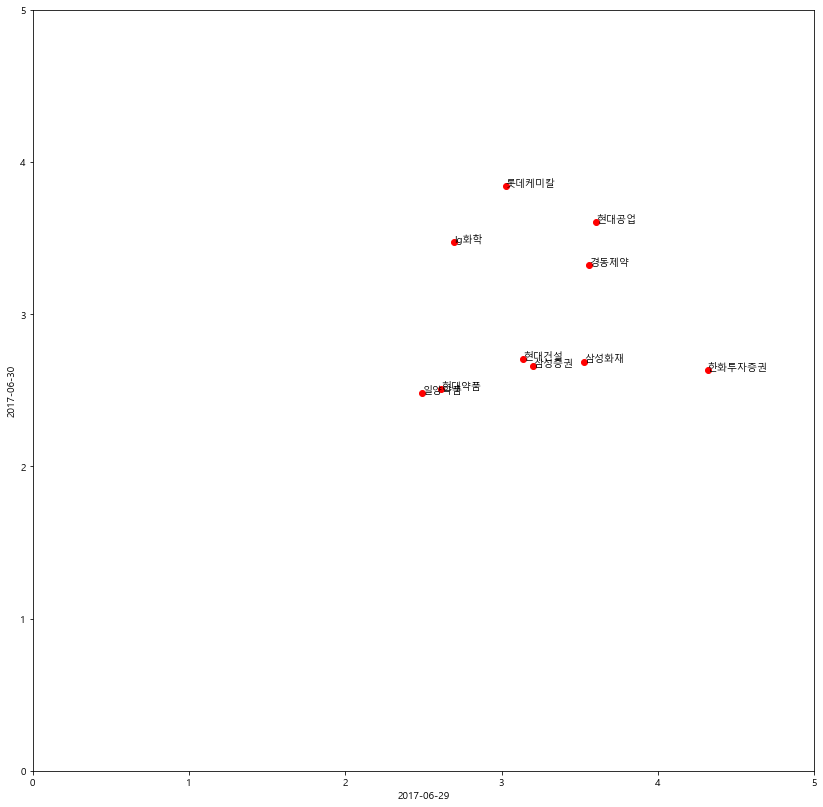

In [40]:
# 날짜에 대해 공통된 기업 plot으로 그리기
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(14,14)) 


li = []
li2 = []

for i in c['2017-06-29']:
    if i in c['2017-06-30']: 
        li.append(c['2017-06-29'][i])
        li2.append(c['2017-06-30'][i])
        plt.text(c['2017-06-29'][i],c['2017-06-30'][i],i)

plt.plot(li,li2,'ro') 


plt.axis([0,5,0,5])


plt.xlabel('2017-06-29')
plt.ylabel('2017-06-30')


plt.show()



In [41]:
#피어슨 상관계수
def pearson_cor(data, name1, name2):
    sumX=0 
    sumY=0 
    sumPowX=0 
    sumPowY=0 
    sumXY=0 
    count=0 

    
    for i in data[name1]: 
        if i in data[name2]: 
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    try: 
        return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))
    except : return 0

In [42]:
# 비율 상관계수
def ratio_sim(data, name1, name2):
    

    k = 0
    p = 0
    for oper in data[name1]:
        if oper in data[name2]: 
            k = data[name1][oper]
            p = data[name2][oper]
    
    try:
        if p > k :
            t = k/p
        else :
            t = p/k
    except:
        return 1
    

    
    
 
    return  t

In [43]:
# 코사인 유사도
def cosine_sim(data, name1, name2):
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0
    count = 0
    
    for oper in data[name1]:
        if oper in data[name2]: 
            k = data[name1][oper]
            p = data[name2][oper]
            sum_name1 += pow(data[name1][oper], 2)
            sum_name2 += pow(data[name2][oper], 2)
            sum_name1_name2 += data[name1][oper]*data[name2][oper]
            
    if (math.sqrt(sum_name1)*math.sqrt(sum_name2)) == 0 :
        return 0
    

    

    
 
    return (sum_name1_name2 / (math.sqrt(sum_name1)*math.sqrt(sum_name2)))

In [44]:
#상관계수 구하는 방법 3가지중 ratio로 선택해서 가장 유사도가 높은 날짜 뽑아주기
def top_match(data, name, sim_function=pearson_cor):
    result=[]
    for i in data: 
        if name!=i: 

            result.append((sim_function(data,name,i),i)) 

    result.sort() 
    result.reverse()
    return result

#점수 구하기
def rec (data,person,sim_function=pearson_cor):
    
    
    simSum=0 
    score=0
    result=[] 
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic
    
    
    for sim,name in top_match(data, person): 
        
        
        for oper in data[name]: 

            if oper not in data[person]: #해당 날짜에 없는 기업들
                score+=sim*data[name][oper] 
                score_dic.setdefault(oper,0) # 기본값 설정
                score_dic[oper]+=score # 합계 구함
 
                
                sim_dic.setdefault(oper,0) 
                sim_dic[oper]+=sim
 
            score=0  
    
    for key in score_dic: 
        
            
            
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합

        if score_dic[key] > 0:
            result.append((round(score_dic[key],2),key)) 
    result.sort()
    result.reverse() 
    return result




In [45]:
c['2019-12-13'] = {"현대차증권" : 5}
rec(c, '2019-12-13')[0:3]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


[]

In [121]:
c['2019-12-14'] = {"현대차증권" : 1}
rec(c, '2019-12-14')[0:3]

[(3.59, '현대공업'), (3.27, '경동제약'), (3.07, '롯데케미칼')]

In [122]:
c['2019-12-13'] = {"현대차증권" : 5 }
rec(c, '2019-12-13')[0:20]

[(3.6, '현대공업'),
 (3.28, '경동제약'),
 (3.1, '롯데케미칼'),
 (3.03, '삼성화재'),
 (3.03, 'lg유플러스'),
 (2.94, '한화'),
 (2.93, '삼성제약'),
 (2.93, 'lg화학'),
 (2.91, '현대해상'),
 (2.9, '한화손해보험'),
 (2.9, '한화생명'),
 (2.9, '롯데하이마트'),
 (2.88, '현대건설'),
 (2.87, '동국제약'),
 (2.83, '삼성증권'),
 (2.81, '현대약품'),
 (2.8, '한미약품'),
 (2.8, 'lg상사'),
 (2.78, '한화케미칼'),
 (2.78, '롯데칠성')]

In [ ]:
#기사 긍부정
def sen_slice (sen):
    for a in sen:
        if(a=='?' or a =='!' or a=='.'):
            sen = sen.replace(a,".")
    return sen
def split_review(review):
    review2=[]
    for lines in review:
        sen1=lines.split('.')
        for line2 in sen1:
            if len(line2)>2:
                review2.append(line2)
    return review2

# kkmawordsM 단어의 긍부정을 알아내기 위해, 명사를 착각하지 않기위해 만들어놓음
# 동사 명사 등등의 중요 단어들 뽑아내기 위해서
kkmawordsM=['안','못','하','있','이','없','않','아니']
kkmawords=['ETD','VV','VA','XR','NNG']

def kkma_slice2(twittersen):
    totalsen=[]
    two=False
    for sen_one in twittersen:  
        list2=[]
        list3=[]
        try:
            kkmasen =kkma.pos(sen_one)
            for tokens in range(0,len(kkmasen)):
#                 kkmawordsM에 있는단어 찾아서 그대로 저장
                if kkmasen[tokens][0] in kkmawordsM:
                    list2.append([kkmasen[tokens][0],kkmasen[tokens][1]])
    #           kkmawords에 포함되는 것들 그대로 저장
                elif kkmasen[tokens][1] in kkmawords:
                    list2.append([kkmasen[tokens][0],kkmasen[tokens][1]])
            totalsen.append(list2)
        except:
            pass
    return totalsen

그냥=['하','있','이','받']
kkmawords2=['NNG','VV','VA','XR','IC']
EETD=['ETD']
긍정뒤=['안','못']
부정뒤=['않','아니','없']
def TorF (boolean):
    if boolean==1:
        return -1;
    elif boolean==-1:
        return 1;
    else:
        return 0;
# 걍 보기 쉽게 만들려고 한거 필요없음
def show_one(list):
    for i in list:
        print(i)
        print("\n")
# 주로 동사, 형용사
def pnn(list123,list1,list2):
    for tokens_one in list123:
#         모든 단어 토큰에 0을 기본적으로 부여해주고 긍정단어에는1 부정단어에는 2를 포함
        for a in tokens_one :
            a.append(0)
            if a[0] in list1:
                a[2]=1
            elif a[0] in list2:
                a[2]=-1
#                 안,못이라는 단어가 있으면 뒤의 단어의 긍부정을 반대로 바꿔줌 ex)긍정->부정, 부정->긍정
        for num in range(0,len(tokens_one)):
            if (tokens_one[num][0] in 긍정뒤)and (num!=len(tokens_one)-1):
                tokens_one[num+1][2]=TorF(tokens_one[num+1][2])     
#                 '그냥'안의 포함되는 단어가 나오면 그 앞의 명사는 명사가아니라 형용사임 ex) 행복하다 -> 행복 +하 +다
            if (tokens_one[num][0] in 그냥) and (num!=0):
                tokens_one[num][2]=tokens_one[num-1][2]
                tokens_one[num-1][2]=0
#             만약 -ㄴ이나 는이 나오면 앞의 형용사와 뒤의 명사를 이어준다. ex)행복한 하루 = 행복하 ㄴ 하루 로 나눠짐
            if (tokens_one[num][1] in EETD) and (num!=0) and (num!=len(tokens_one)-1):
                tokens_one[num+1][2]=tokens_one[num-1][2]
#             그러면 행복 다음인 하에다가 +1(긍정이기 때문에) 해주고 행복은 0으로 고쳐준다
                tokens_one[num-1][2]=0
#     않, 아니, 없이 나오면 앞의 단어의 긍부정을 반대로 바꿔준다.
        for c in range(0,len(tokens_one)):
            if (tokens_one[c][0] in 부정뒤) and (c!=0):
                if tokens_one[c-1][2]!=0:
                    tokens_one[c-1][2]=TorF(tokens_one[c-1][2])
                else:
                    tokens_one[c-2][2] = TorF(tokens_one[c-2][2])
  
    return list123

# 조합있나보기 -긍정
def pnnn(list123,list1):
    for tokens_one in list123:
        for num in range(0,len(tokens_one)):
            for ii in range(0,3): # 바로 뒤의 3개
                for jj in range(0,len(list1)): # 리스트길이만큼
                    try: # 리스트에 있는 0번째 단어가 있고, 그 뒤에 3개까지 1번째 단어가 있을 경우
                        if tokens_one[num][0] in list1[jj][0] and tokens_one[num+(ii+1)][0] in list1[jj][1]:
                            tokens_one[num+ii+1][2]=1 # 1을 저장
                            try:
                                # 부정어가 있나보고 반대로 바꿔주기
                                if tokens_one[num+ii][0] in 긍정뒤:
                                    tokens_one[num+ii+1][2] = TorF(tokens_one[num+ii+1][2])
                                elif tokens_one[num+ii+2][0] in 부정뒤:
                                    tokens_one[num+ii+1][2] =TorF(tokens_one[num+ii+1][2])
                                elif tokens_one[num+ii+3][0] in 부정뒤:
                                    tokens_one[num+ii+1][2] =TorF(tokens_one[num+ii+1][2])
                            except:
                                pass
                    except:
                        pass
# 조합있나보기 -부정
def nnnn(list123,list1):
    for tokens_one in list123:
        for num in range(0,len(tokens_one)):
            for ii in range(0,3): # 바로 뒤의 3개
                for jj in range(0,len(list1)): # 리스트길이만큼
                    try:
#                         print(tokens_one[num][0],tokens_one[num+ii+1][0])
                        if tokens_one[num][0] in list1[jj][0] and tokens_one[num+(ii+1)][0] in list1[jj][1]:
                            tokens_one[num+ii+1][2]=-1
                            try:
                                if tokens_one[num+ii][0] in 긍정뒤:
                                    tokens_one[num+ii+1][2] = TorF(tokens_one[num+ii+1][2])
                                elif tokens_one[num+ii+2][0] in 부정뒤:
                                    tokens_one[num+ii+1][2] =TorF(tokens_one[num+ii+1][2])
                                elif tokens_one[num+ii+3][0] in 부정뒤:
                                    tokens_one[num+ii+1][2] =TorF(tokens_one[num+ii+1][2])
                            except:
                                pass
                    except:
                        pass

# 긍정카운팅수, 부정카운팅 수 보기
def porn(list1):
    postotal=[]
    negtotal=[]
    for i in list1:
        posi=0
        nega=0
        for j in i:
            if j[2]<0: # 한 문장에 하나라도 부정어가 있으면 나온만큼 수를 저장
                nega=nega+1
            elif j[2]>0: #  한 문장에 하나라도 긍정어가 있으면 나온만큼 수를 저장
                posi=posi+1
        if posi==0 : # 긍정어가 없었다면 0을 저장
            postotal.append(0)
        else:
            postotal.append(posi)
        if nega==0: # 부정어가 없었다면 0을저장
            negtotal.append(0)
        else:
            negtotal.append(nega)
    return postotal,negtotal
    

In [ ]:
긍정 = ['늘어나','효과적','긍정적','지원','상승세','치솟','발표','매수','도입','기대','혁신']
부정 = ['하락','하락세','매도','사망']
긍정조합 = [['효율','높이'],['외국인','매수'],['매물대','돌파'],['주가','급등'],['효과','기대'],['최고','자산'],['인지도','상승']]
부정조합 = [['외국인','매도'],['주가','급등']]

In [ ]:
file=open("삼성생명_06.txt",'r',encoding='UTF8')
line1=file.readlines()
file.close()
line1=["""【청주=뉴시스】김재광 기자 = ◇ LG화학 오창공장 환경부장관상 수상

LG화학 오창 공장은 2017 생활화학 안전주간행사의 '화학 안전공동체 우수사례 발표'에서 최우수상인 환경부장관상을 받았다고 4일 밝혔다.

생활화학 안전주간은 국민·시민단체·기업·정부가 참여해 생활 화학제품과 화학물질 정보를 공유하기 위해 마련된 행사다.  

오창 공장은 화학안전공동체 주관기업으로서 지역 10개 업체와 모임을 하고 정기 간담회, 합동점검을 통해 안전한 화학물질 관리체계를 구축하는데 기여한 공로를 인정받았다. 

비상 상황 시 신속하게 대응할 수 있도록 금강유역환경청 등 유관기관과 합동훈련도 했다.  









    



지금 신청하기



 

◇ 청주시 오춘식·견용선씨 부부 새농민상 본상 

 충북농협은 4일 청주시 옥산면 오춘식(58)·견용선(54)씨 부부가 제52회 '새농민상(像)' 본상을 받았다고 밝혔다. 

오씨 부부는 플라스틱병을 이용, 느타리버섯을 재배하고 시설에 자동화 시스템을 도입했다.  

칸막이형 재배사와 지열을 이용한 공조시설을 설치, 생산비를 줄이고 연중 생산이 가능한 기술집약적 시스템을 구축한 공로를 인정받았다. 

오씨는 농업고 학생과 후계 농업인을 대상으로 자신의 농장을 현장체험학습 장소로 제공하고 영농기술을 전수하는 등 농업경쟁력을 높이고 농가소득증대에 기여했다. 

새농민상 본상은 농협중앙회가 매월 선정하는 '이달의 새농민상' 수상자 가운데, 농업인의 소득증대와 선진 영농기술 보급에 앞장선 농업인에게 주어지는 상이다."""]
line1=sen_slice(line1)
print(line1)
line1=split_review(line1)
print(line1)
line1=kkma_slice2(line1)
print(line1)
pnn(line1,긍정,부정)
pnnn(line1,긍정조합)
nnnn(line1,부정조합)

sum_p,sum_n=porn(line1)
print(sum_p)
sum_p = np.array(sum_p).sum()
sum_n = np.array(sum_n).sum()
print(sum_p)
print(sum_n)

In [ ]:
file=open("한화생명_06.txt",'r',encoding='UTF8')
line1=file.readlines()
file.close()
line1=sen_slice(line1)
line1=split_review(line1)
line1=kkma_slice2(line1)
pnn(line1,긍정,부정)
pnnn(line1,긍정조합)
nnnn(line1,부정조합)
sum_p,sum_n=porn(line1)
sum_p = np.array(sum_p).sum()
sum_n = np.array(sum_n).sum()
print(sum_p)
print(sum_n)

In [ ]:
# 실시간댓글보기크롤링 


driver1 = webdriver.Chrome("driver/chromedriver.exe")
driver1.implicitly_wait(3)
name = input().upper()
code=''

f = open('상장법인목록.csv')
data = csv.reader(f)
header = next(data)
data = list(data)

for row in data:

    if row[0] ==  name:
        code = row[1]
        break



if code == '' :
    for row in data:

        if name in row[0]:
            code = row[1]
            break

for i in range(6 - len(code)):
    code = '0' + code


url = "https://m.stock.naver.com/item/main.nhn#/stocks/" + code + "/discuss"
        
driver1.get(url)
time.sleep(5)
driver1.find_element_by_xpath('//*[@id="content_body"]/div[1]/div[1]/div[1]/a[2]').click()
time.sleep(5)

html = driver1.page_source
soup = BeautifulSoup(html,'lxml')

review = soup.find_all('a','_child_wrapper lst_block')
review_list = []


for row in review:

    for i in range(len(row.find('p').text.strip().split('\n'))):
        if 'http' not in row.find('p').text.strip().split('\n')[i] and 'html' not in row.find('p').text.strip().split('\n')[i]:
            review_list.append(row.find('p').text.strip().split('\n')[i])
            
print(review_list)
lines=review_list
total=[]
for i in lines:
    ex = open_files(i)
    ex_C=Counter(ex)
    긍정일까 = 라플라스(ex, counts1_list,counts1,counts_len,counts_allly)
    부정일까= 라플라스(ex,counts2_list,counts2,counts_len,counts_allly)
    print(긍정일까)
    print(부정일까)
    if 긍정일까>부정일까:
        for i in ex:
            if i in ['않','아니','없','안','못']:
                total.append(-1)
                break
        total.append(1)
    else: 
        total.append(-1)
        
total = np.array(total)
total = total.sum()

if total>0:
    print('긍정 댓글')
else:
    print('부정 댓글')